# Importing Libraries

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Loading data

In [9]:

data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Preprocessing

Identified categorical variables and converting them to string values

In [10]:
# Map season to its string equivalent
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
data['season'] = data['season'].map(season_mapping)

# Map weathersit to its string equivalent
weathersit_mapping = {
    1: 'Clear/Few clouds/Partly cloudy',
    2: 'Mist/Cloudy/Broken clouds/Few clouds',
    3: 'Light Snow/Light Rain + Thunderstorm/Scattered clouds',
    4: 'Heavy Rain/Ice Pallets/Thunderstorm/Mist/Snow/Fog'
}
data['weathersit'] = data['weathersit'].map(weathersit_mapping)

# Map month to its string equivalent
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
data['mnth'] = data['mnth'].map(month_mapping)

# Map weekday to its string equivalent
weekday_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
data['weekday'] = data['weekday'].map(weekday_mapping)


In [11]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Saturday,0,Mist/Cloudy/Broken clouds/Few clouds,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Sunday,0,Mist/Cloudy/Broken clouds/Few clouds,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Monday,1,Clear/Few clouds/Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Tuesday,1,Clear/Few clouds/Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Wednesday,1,Clear/Few clouds/Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600




Convert categorical variables to strings

In [12]:

categorical_cols = ['season', 'weathersit', 'mnth', 'weekday']
data[categorical_cols] = data[categorical_cols].astype(str)


Exploratory Analysis of Categorical Variables. 


Analyze the effect of categorical variables on bike demand


Analysis for season:
season
Fall      5644.303191
Summer    4992.331522
Winter    4728.162921
Spring    2608.411111
Name: cnt, dtype: float64


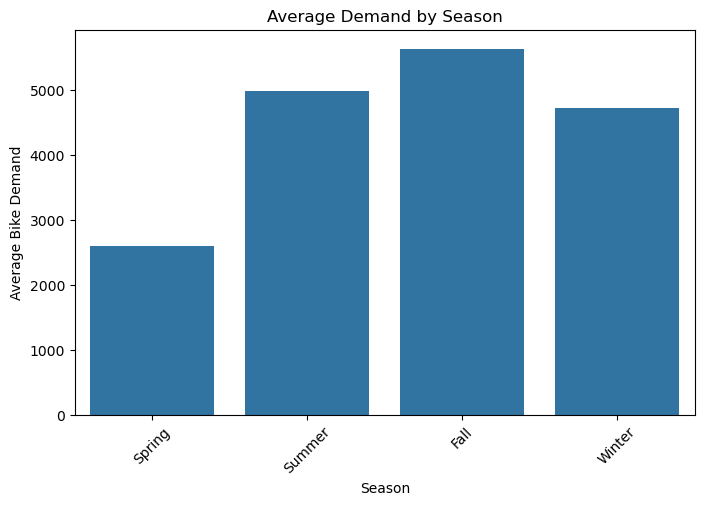


Analysis for weathersit:
weathersit
Clear/Few clouds/Partly cloudy                           4876.786177
Mist/Cloudy/Broken clouds/Few clouds                     4044.813008
Light Snow/Light Rain + Thunderstorm/Scattered clouds    1803.285714
Name: cnt, dtype: float64


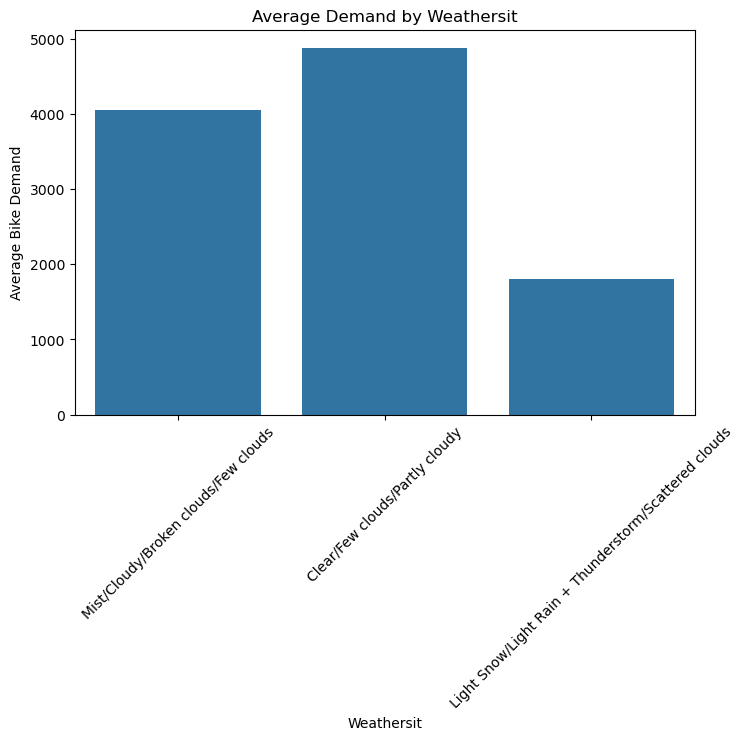


Analysis for mnth:
mnth
June         5772.366667
September    5766.516667
August       5664.419355
July         5563.677419
May          5349.774194
October      5199.225806
April        4484.900000
November     4247.183333
March        3692.258065
December     3403.806452
February     2669.964286
January      2176.338710
Name: cnt, dtype: float64


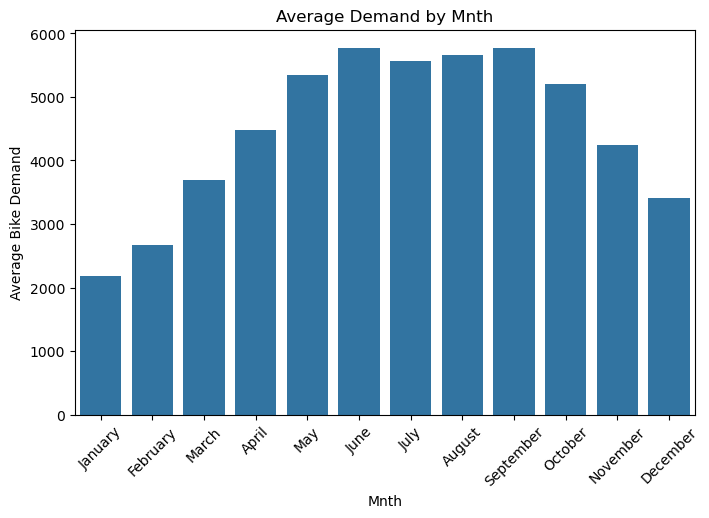


Analysis for weekday:
weekday
Friday       4690.288462
Thursday     4667.259615
Wednesday    4574.893204
Saturday     4550.542857
Tuesday      4510.663462
Monday       4338.123810
Sunday       4228.828571
Name: cnt, dtype: float64


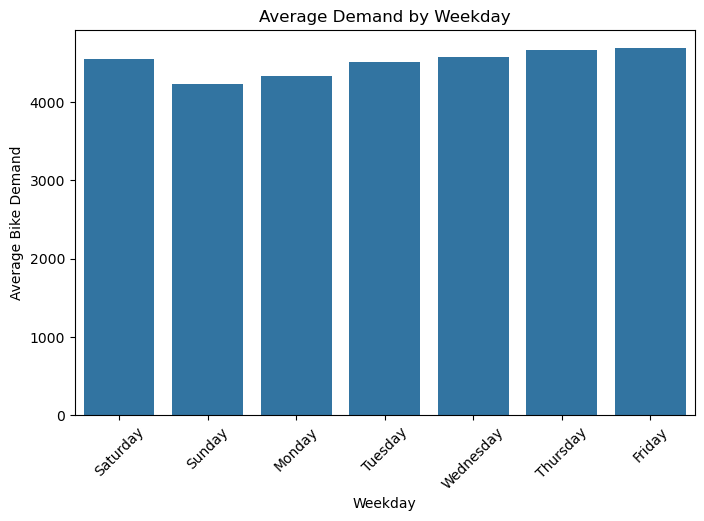

In [13]:
for col in categorical_cols:
    print(f"\nAnalysis for {col}:")
    print(data.groupby(col)['cnt'].mean().sort_values(ascending=False))

    # Visualization
    plt.figure(figsize=(8, 5))
    sns.barplot(x=col, y='cnt', data=data, estimator=np.mean, errorbar=None)
    plt.title(f"Average Demand by {col.capitalize()}")
    plt.xticks(rotation=45)
    plt.ylabel("Average Bike Demand")
    plt.xlabel(col.capitalize())
    plt.show()

# Summary

1. Fall has high demand while spring has lower demand
2. Clear days have more demand
3. MId of the year seem to have high demand while winters have lower

In [14]:
data.to_excel("newdata.xlsx")

<Figure size 1000x800 with 0 Axes>

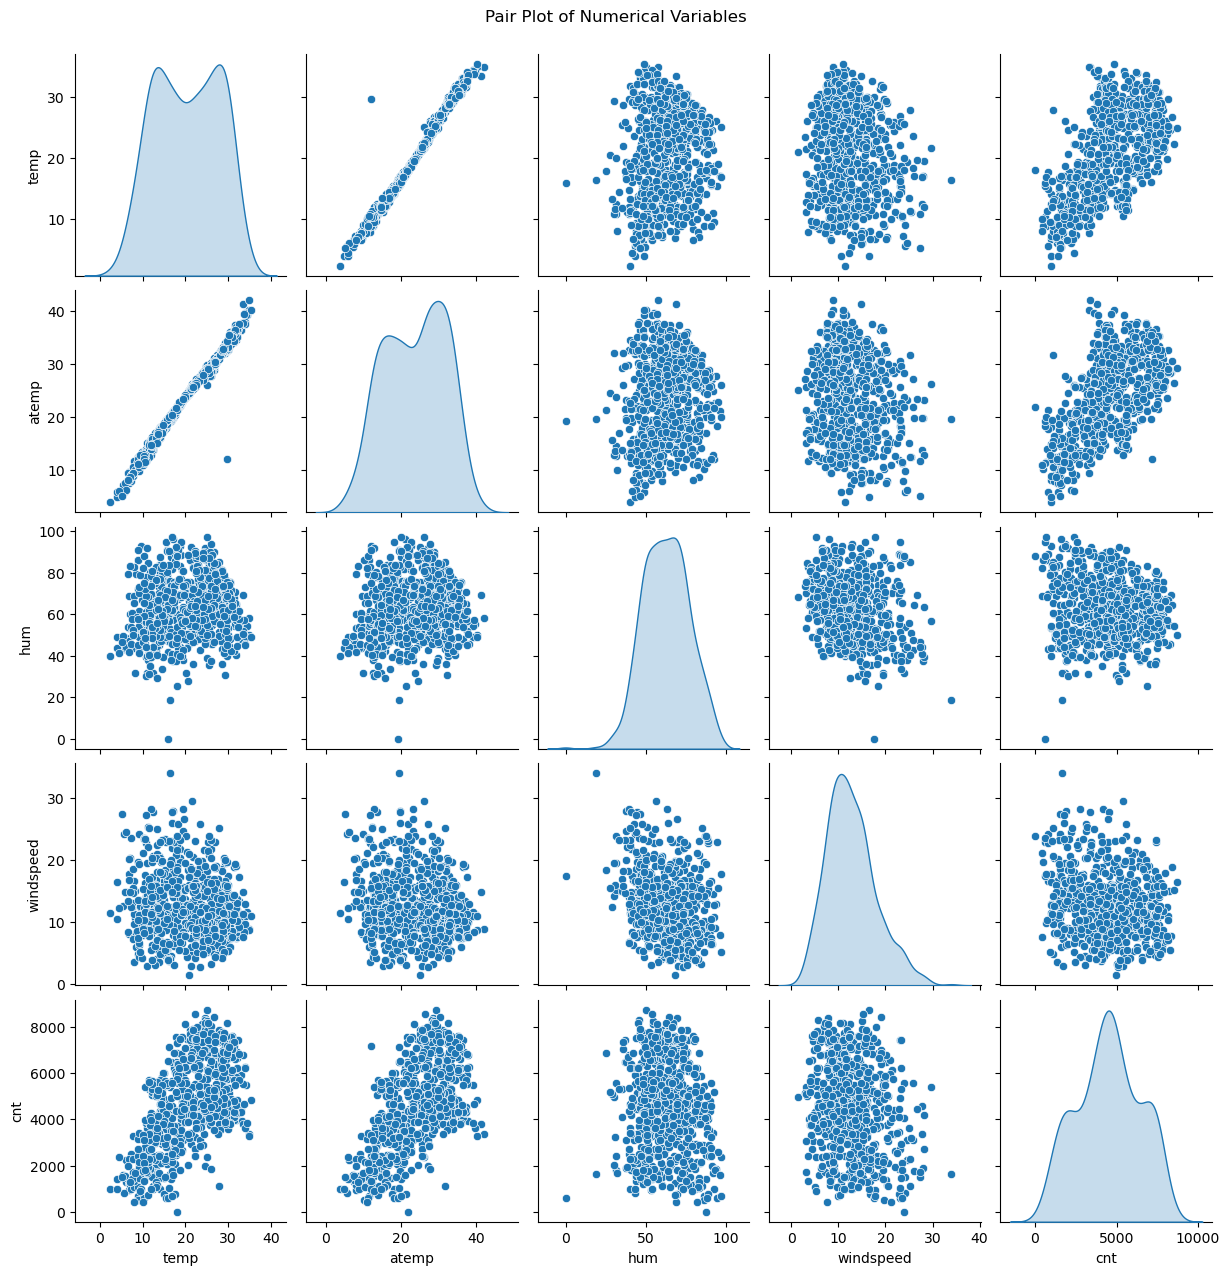

In [15]:
# Analyze correlations between numerical variables and target variable
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize=(10, 8))
sns.pairplot(data[numerical_cols], diag_kind='kde')
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()

In [16]:
# Calculate correlation matrix
correlation_matrix = data[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991696  0.128565  -0.158186  0.627044
atemp      0.991696  1.000000  0.141512  -0.183876  0.630685
hum        0.128565  0.141512  1.000000  -0.248506 -0.098543
windspeed -0.158186 -0.183876 -0.248506   1.000000 -0.235132
cnt        0.627044  0.630685 -0.098543  -0.235132  1.000000


# Correlation Insights


1. Strong Positive Correlations
	•	temp and cnt (0.627):
	◦	There is a strong positive correlation between temperature (temp) and bike demand (cnt).
	◦	As temperature increases, bike demand tends to increase. This makes sense, as people are more likely to use bikes in pleasant weather conditions.

2. Weak and Negative Correlations
	•	hum and cnt (-0.099):
	◦	Humidity (hum) has a weak and slightly negative correlation with bike demand.
	◦	High humidity might make bike rides uncomfortable, slightly reducing demand, but the effect is not substantial.
	•	windspeed and cnt (-0.235):
	◦	Windspeed has a moderate negative correlation with bike demand.
	◦	Higher wind speeds might deter people from biking, which explains the negative relationship.

3. Relationships Between Features
	•	hum and windspeed (-0.249):
	◦	A weak negative correlation between humidity and windspeed suggests no significant relationship between the two variables.





# Drop irrelevant columns
1. 'instant' is an index and 'dteday' is a date, so they won't be used in the model
2.  'casual' and 'registered' should not be included since they sum to 'cnt'


In [17]:

data = data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# deleted atemp

In [18]:
data.drop(columns=['atemp'], inplace= True)

In [19]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist/Cloudy/Broken clouds/Few clouds,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist/Cloudy/Broken clouds/Few clouds,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear/Few clouds/Partly cloudy,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear/Few clouds/Partly cloudy,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear/Few clouds/Partly cloudy,9.305237,43.6957,12.522300,1600


In [20]:
data.to_excel('test.xlsx')

# One-hot encode categorical variables

In [21]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = encoder.fit_transform(data[categorical_cols])
categorical_encoded = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Merge encoded data and drop original categorical columns

In [22]:
data = pd.concat([data, categorical_encoded], axis=1)
data = data.drop(categorical_cols, axis=1)

# as there are redundant based on date, saturday and sunday are holidays, so dropping

In [23]:
data.drop(columns=['weekday_Saturday','weekday_Sunday'], inplace= True)

# Feature Scaling

In [24]:

scaler = StandardScaler()
numerical_cols = ['temp', 'hum', 'windspeed']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


# Split data into features (X) and target (y)

In [25]:

X = data.drop('cnt', axis=1)
y = data['cnt']

# Train-test split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build the Linear Regression Model

In [27]:
print(X_train.info())  # Check the data types of all columns


<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 247 to 102
Data columns (total 26 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   yr                                                                584 non-null    int64  
 1   holiday                                                           584 non-null    int64  
 2   workingday                                                        584 non-null    int64  
 3   temp                                                              584 non-null    float64
 4   hum                                                               584 non-null    float64
 5   windspeed                                                         584 non-null    float64
 6   season_Spring                                                     584 non-null    float64
 7   season_Summer                         

# Linear Regression

In [28]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()



# Predictions

In [29]:

y_pred = model.predict(X_test)

# Evaluation

In [30]:

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared on test set: {r2}")
print(f"Mean Squared Error on test set: {mse}")

R-squared on test set: 0.8596169393477495
Mean Squared Error on test set: 480509.0316107218




# Validate Linear Regression Assumptions
# Residual Analysis

In [31]:

residuals = y_test - y_pred



# Plot residuals

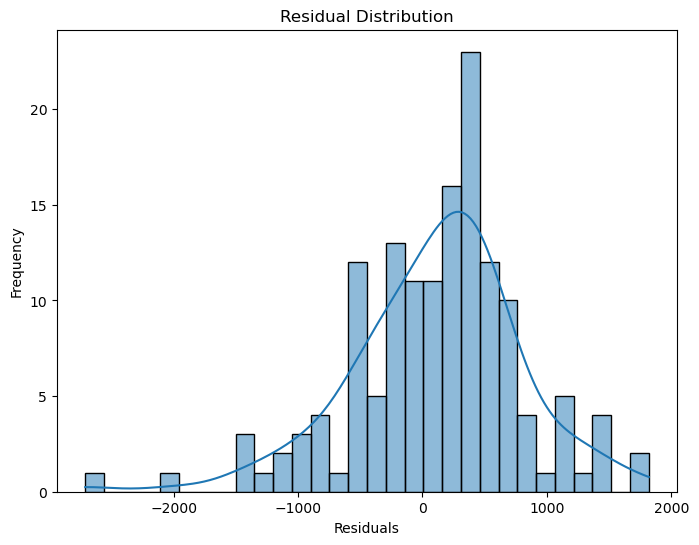

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()



# Scatter plot of predicted vs residuals

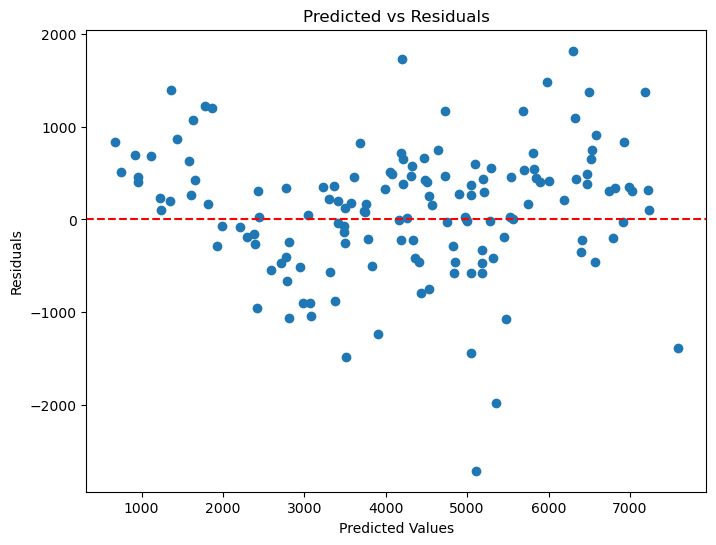

In [33]:

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Predicted vs Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


# Feature Importance (Top 3 features)
# Using absolute coefficients to identify the most impactful features


In [34]:
coefficients = pd.Series(model.coef_, index=X_train.columns)

In [35]:
top_features = coefficients.abs().sort_values(ascending=False).head(3)

In [36]:
print("\nTop 3 Features Contributing to Demand:")
print(top_features)


Top 3 Features Contributing to Demand:
weathersit_Light Snow/Light Rain + Thunderstorm/Scattered clouds    2068.844236
yr                                                                  1970.741175
season_Spring                                                       1048.106477
dtype: float64


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Select only numeric features
X = data.drop(columns=['cnt'])  # Exclude target variable
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical variables

# Add a constant for intercept calculation
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                                              Feature        VIF
0                                               const  58.421022
1                                                  yr   1.046486
2                                             holiday   1.374115
3                                          workingday   2.301696
4                                                temp   6.997959
5                                                 hum   2.129363
6                                           windspeed   1.221414
7                                       season_Spring  10.407757
8                                       season_Summer   7.963207
9                                       season_Winter   8.323168
10  weathersit_Light Snow/Light Rain + Thunderstor...   1.327494
11    weathersit_Mist/Cloudy/Broken clouds/Few clouds   1.632286
12                                        mnth_August   5.572737
13                                      mnth_December   5.617228
14                       

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame called df
# Example: df = pd.read_csv('your_dataset.csv')

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# If you want to print the correlation matrix directly
print(correlation_matrix)


NameError: name 'df' is not defined

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'df' is your DataFrame with the dataset

# Function to calculate VIF
def calculate_vif(df):
    X = add_constant(df)  # Adds a constant column for intercept
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# 1. Drop 'holiday' and 'weekday_Sunday'
df_reduced = df.drop(columns=['holiday', 'weekday_Sunday'])

# 2. Drop 'atemp' (high correlation with 'temp')
df_reduced = df_reduced.drop(columns=['atemp'])

# Recalculate VIF after feature removal
vif_data = calculate_vif(df_reduced)

# Show VIF results after feature removal
print("VIF After Removing 'holiday', 'weekday_Sunday', and 'atemp':")
print(vif_data)

# Optionally, if you want to handle other categorical features like 'season_Spring', 
# you could encode them properly or apply regularization techniques like Ridge or Lasso:
# Example: Using Ridge Regression to reduce multicollinearity
from sklearn.linear_model import Ridge

X = df_reduced.drop(columns='target')  # Replace 'target' with your target variable
y = df_reduced['target']  # Replace with your target variable

ridge = Ridge(alpha=1.0)  # Apply regularization to reduce multicollinearity
ridge.fit(X, y)

# Print coefficients to understand feature importance after regularization
print("Ridge Regression Coefficients After Regularization:")
print(ridge.coef_)


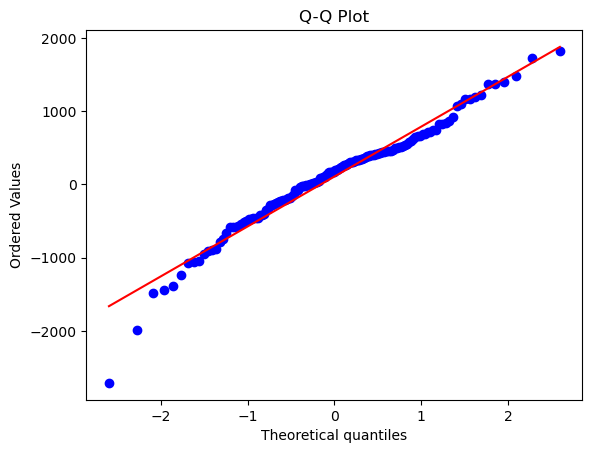

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming 'residuals' is your list/array of residuals
# Example: residuals = actual_values - predicted_values

# Generate Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)

# Customize the plot
plt.title("Q-Q Plot")
plt.show()


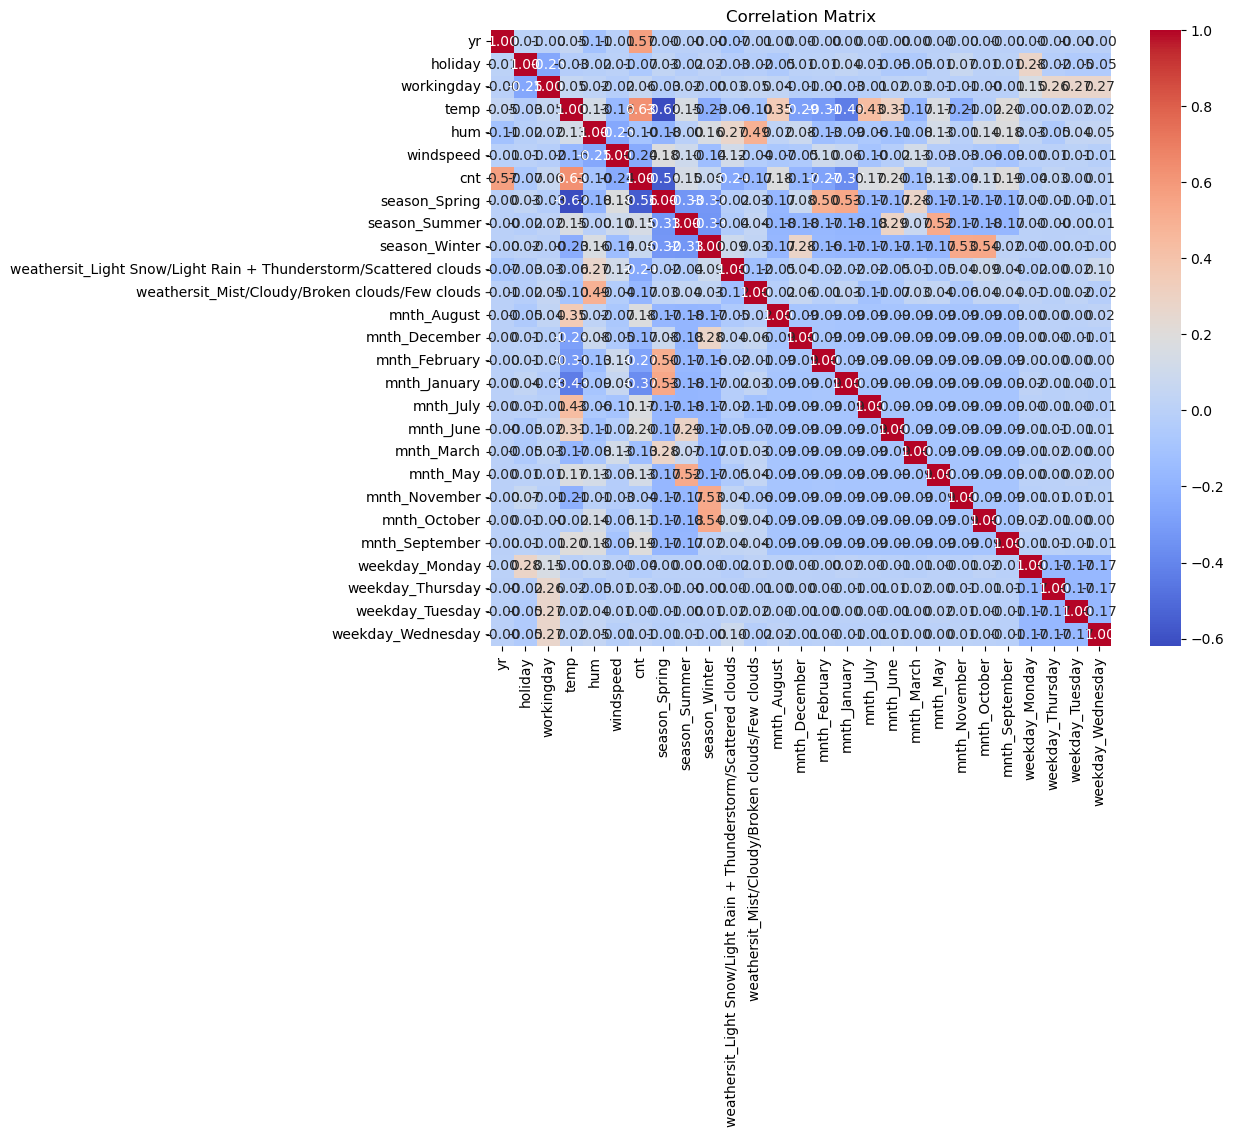

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [128]:
data.head

<bound method NDFrame.head of      yr  holiday  workingday      temp       hum  windspeed   cnt  \
0     0        0           0 -0.827613  1.252343  -0.387833   985   
1     0        0           0 -0.722069  0.480996   0.748899   801   
2     0        0           1 -1.635432 -1.338073   0.745931  1349   
3     0        0           1 -1.615560 -0.261577  -0.389769  1562   
4     0        0           1 -1.468226 -1.340294  -0.046477  1600   
..   ..      ...         ...       ...       ...        ...   ...   
725   1        0           1 -1.319509  0.177576   2.059845  2114   
726   1        0           1 -1.324068 -0.264634  -0.452029  3095   
727   1        0           0 -1.324068  0.880424  -0.853182  1341   
728   1        0           0 -1.310404 -1.014341   2.067858  1796   
729   1        0           1 -1.529024 -0.352490  -0.460094  2729   

     season_Spring  season_Summer  season_Winter  ...  mnth_June  mnth_March  \
0              1.0            0.0            0.0  ...        

# IMPROVISING THE MODEL BY REMOVING VARIABLES basis VIF and Correlation analysis and Reperforming the entire analysis

In [39]:
data2=data.drop(columns=['season_Spring','season_Summer','season_Winter' ])

# Importing Libraries

In [40]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Feature Scaling

In [41]:

scaler = StandardScaler()
numerical_cols = ['temp', 'hum', 'windspeed']
data2[numerical_cols] = scaler.fit_transform(data2[numerical_cols])

# Renaming data

In [43]:

X = data2.drop('cnt', axis=1)
y = data2['cnt']

# Linear Regression

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Train-test split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Linear Regression Model

In [46]:
print(X_train.info())  # Check the data types of all columns


<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 247 to 102
Data columns (total 23 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   yr                                                                584 non-null    int64  
 1   holiday                                                           584 non-null    int64  
 2   workingday                                                        584 non-null    int64  
 3   temp                                                              584 non-null    float64
 4   hum                                                               584 non-null    float64
 5   windspeed                                                         584 non-null    float64
 6   weathersit_Light Snow/Light Rain + Thunderstorm/Scattered clouds  584 non-null    float64
 7   weathersit_Mist/Cloudy/Broken clouds/F

# Linear Regression

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predictions

In [48]:
y_pred = model.predict(X_test)


# Evaluation

In [49]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared on test set: {r2}")
print(f"Mean Squared Error on test set: {mse}")

R-squared on test set: 0.8495265155920063
Mean Squared Error on test set: 515046.95751778333



# Residual Analysis

In [51]:
residuals = y_test - y_pred

# Plot residuals

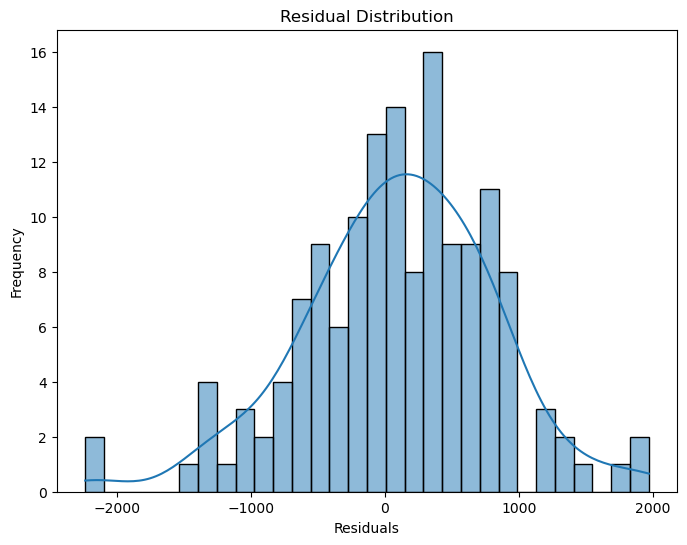

In [53]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Scatter plot of predicted vs residuals

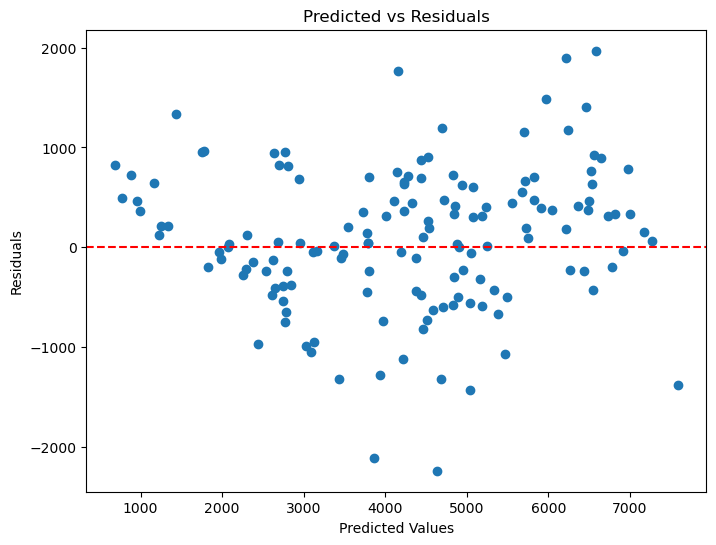

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Predicted vs Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [55]:
coefficients = pd.Series(model.coef_, index=X_train.columns)

In [56]:
top_features = coefficients.abs().sort_values(ascending=False).head(3)


# Feature Importance basis updated Model (Top 3 features)
# Using absolute coefficients to identify the most impactful features

In [57]:
print("\nTop 3 Features Contributing to Demand:")
print(top_features)


Top 3 Features Contributing to Demand:
weathersit_Light Snow/Light Rain + Thunderstorm/Scattered clouds    2067.486947
yr                                                                  1973.352358
mnth_January                                                        1234.426637
dtype: float64


# Revised VIF Analysis

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Select only numeric features
X = data2.drop(columns=['cnt'])  # Exclude target variable
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical variables

# Add a constant for intercept calculation
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                                              Feature        VIF
0                                               const  17.179582
1                                                  yr   1.045813
2                                             holiday   1.364716
3                                          workingday   2.301451
4                                                temp   6.832202
5                                                 hum   2.121533
6                                           windspeed   1.209648
7   weathersit_Light Snow/Light Rain + Thunderstor...   1.324808
8     weathersit_Mist/Cloudy/Broken clouds/Few clouds   1.631859
9                                         mnth_August   2.761394
10                                      mnth_December   2.297959
11                                      mnth_February   2.205236
12                                       mnth_January   2.727441
13                                          mnth_July   3.179397
14                       

In [60]:
from sklearn.metrics import r2_score

# Assuming you have predictions (y_pred) and actual values (y_test or y):
r_squared = r2_score(y_test, y_pred)
print(f"R-squared value: {r_squared}")


R-squared value: 0.8495265155920063


# Q-Q Plot Analysis

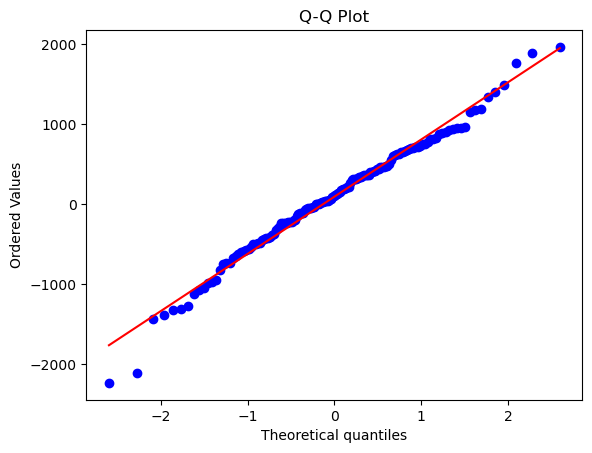

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming 'residuals' is your list/array of residuals
# Example: residuals = actual_values - predicted_values

# Generate Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)

# Customize the plot
plt.title("Q-Q Plot")
plt.show()